In [ ]:
pip install tf_keras

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
import tf_keras

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import pydot

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

In [ ]:
train_data= pd.read_csv("/content/Persona Data - train.csv")
train_data.dropna(axis = 0, how ='any',inplace=True)
train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split()))
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('===========Train Data =========')
print(train_data['persona'].value_counts())
print(len(train_data))
print('==============================')

train_data['text'] = train_data['text'].apply(clean_text)


test_data= pd.read_csv("/content/Persona Data - test.csv")
test_data.dropna(axis = 0, how ='any',inplace=True)
test_data['Num_words_text'] = test_data['text'].apply(lambda x:len(str(x).split()))
mask = test_data['Num_words_text'] >2
test_data = test_data[mask]
print('===========Test Data =========')
print(test_data['persona'].value_counts())
print(len(test_data))
print('==============================')

test_data['text'] = test_data['text'].apply(clean_text)

===========Train Data =========
persona
extraverted               406
openness to experience    403
agreeable                 399
conscientiousness         398
neuroticism               392
Name: count, dtype: int64
1998
===========Test Data =========
persona
neuroticism               108
conscientiousness         102
agreeable                 101
openness to experience     97
extraverted                94
Name: count, dtype: int64
502


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'].tolist(), train_data['persona'].tolist(), test_size=0.33,stratify = train_data['persona'].tolist(), random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution: '+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution: '+ str(Counter(y_valid)))




x_train=np.asarray(X_train)
x_valid = np.array(X_valid)
x_test =np.asarray(test_data['text'].tolist())

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf_keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf_keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['persona'].tolist())
test_labels = np.asarray(tf_keras.utils.to_categorical(test_labels))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:1338
Class distribution: Counter({'extraverted': 272, 'openness to experience': 270, 'conscientiousness': 267, 'agreeable': 267, 'neuroticism': 262})
Valid data len:660
Class distribution: Counter({'extraverted': 134, 'openness to experience': 133, 'agreeable': 132, 'conscientiousness': 131, 'neuroticism': 130})


In [ ]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf_keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['extraverted', 'openness to experience', 'openness to experience', 'conscientiousness', 'conscientiousness', 'openness to experience', 'agreeable', 'neuroticism', 'extraverted', 'extraverted']
Text to number
[2 4 4 1 1 4 0 3 2 2]
Number to category
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==5:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==5:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==5:
        break

======Train dataset ====
tf.Tensor(b'believe creating positive inclusive atmosphere where everyone feels welcome', shape=(), dtype=string) tf.Tensor([0. 0. 1. 0. 0.], shape=(5,), dtype=float32)
tf.Tensor(b'excited about chance contribute initiatives that involve emerging technologies practices', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 1.], shape=(5,), dtype=float32)
tf.Tensor(b'open embracing trends integrating them into work achieve better results', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 1.], shape=(5,), dtype=float32)
tf.Tensor(b'dedicated maintaining strong sense accountability role', shape=(), dtype=string) tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float32)
tf.Tensor(b'make sure stay deadlines deliverables', shape=(), dtype=string) tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float32)
======Validation dataset ====
tf.Tensor(b'enjoy taking tasks that require adapt learn quickly fastpaced settings', shape=(), dtype=string) tf.Tensor([0. 0. 0. 0. 1.], shape=(5,), d

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

In [ ]:
print(x_train[:1])
hub_layer(x_train[:1])

['believe creating positive inclusive atmosphere where everyone feels welcome']


<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.7412999 , -0.07157076,  2.6995463 , -1.224667  , -0.8157608 ,
        -2.1279552 , -0.77777433,  0.6187748 ,  0.5780765 , -0.5260192 ,
         0.01749871,  0.03668141, -0.03420731, -0.06532818, -2.6744199 ,
        -0.49846193,  2.4040318 ,  0.09306699, -0.6995307 , -0.56815624]],
      dtype=float32)>

In [ ]:
from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weight_dict[3] = 0.65  # Reduce weight for 'neuroticism'
class_weight_dict[0] = 1.7  # Increase weight for 'agreeable'
class_weight_dict[2] = 1.4  # Increase weight for 'extraverted'

In [ ]:
model = tf_keras.Sequential()
model.add(hub_layer)
model.add(tf_keras.layers.Dense(10, activation='relu'))
model.add(tf_keras.layers.Dense(5,activation='sigmoid'))

model.summary()
model.compile(loss=tf_keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 20)                389380    
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 389645 (1.49 MB)
Trainable params: 389645 (1.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


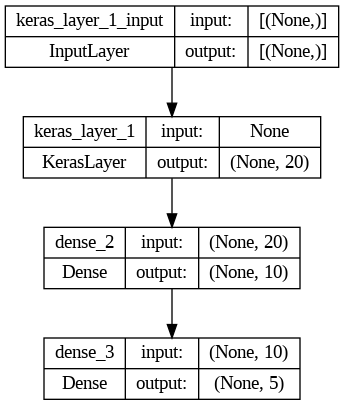

In [ ]:
tf_keras.utils.plot_model(model, "simpleNN_model.png", show_shapes=True)

In [ ]:
epochs = 20


history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1, class_weight = class_weight_dict)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tf_keras/src/backend.py:5577: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/11 [==============================] - 1s 26ms/step - loss: 1.7888 - categorical_accuracy: 0.2564 - val_loss: 1.5489 - val_categorical_accuracy: 0.2985
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 1.6593 - categorical_accuracy: 0.3109 - val_loss: 1.4519 - val_categorical_accuracy: 0.3439
Epoch 3/20
11/11 [==============================] - 0s 9ms/step - loss: 1.5628 - categorical_accuracy: 0.3722 - val_loss: 1.3891 - val_categorical_accuracy: 0.3879
Epoch 4/20
11/11 [==============================] - 0s 9ms/step - loss: 1.4873 - categorical_accuracy: 0.4178 - val_loss: 1.3317 - val_categorical_accuracy: 0.4212
Epoch 5/20
11/11 [==============================] - 0s 9ms/step - loss: 1.4182 - categorical_accuracy: 0.4537 - val_loss: 1.2756 - val_categorical_accuracy: 0.4697
Epoch 6/20
11/11 [==============================] - 0s 10ms/step - loss: 1.3551 - categorical_accuracy: 0.5030 - val_loss: 1.2206 - val_categorical_accuracy: 0.5061
Epoch 7/20
11/11 [=======

In [ ]:
history.history

{'loss': [1.7887898683547974,
  1.6592583656311035,
  1.562764048576355,
  1.4873037338256836,
  1.418200135231018,
  1.355080008506775,
  1.294168472290039,
  1.2348335981369019,
  1.1757230758666992,
  1.1164895296096802,
  1.0578205585479736,
  0.9979676008224487,
  0.9410759210586548,
  0.8858446478843689,
  0.8337144255638123,
  0.7843918204307556,
  0.7372798919677734,
  0.6938770413398743,
  0.6524993777275085,
  0.6144315004348755],
 'categorical_accuracy': [0.2563527524471283,
  0.31091180443763733,
  0.37219730019569397,
  0.41778773069381714,
  0.4536621868610382,
  0.5029895305633545,
  0.5448430776596069,
  0.5814648866653442,
  0.6203288435935974,
  0.6614349484443665,
  0.6965620517730713,
  0.7346786260604858,
  0.7623318433761597,
  0.7877429127693176,
  0.8071748614311218,
  0.8221225738525391,
  0.8400598168373108,
  0.8497757911682129,
  0.8609865307807922,
  0.8714499473571777],
 'val_loss': [1.5488942861557007,
  1.4519357681274414,
  1.389054536819458,
  1.331740

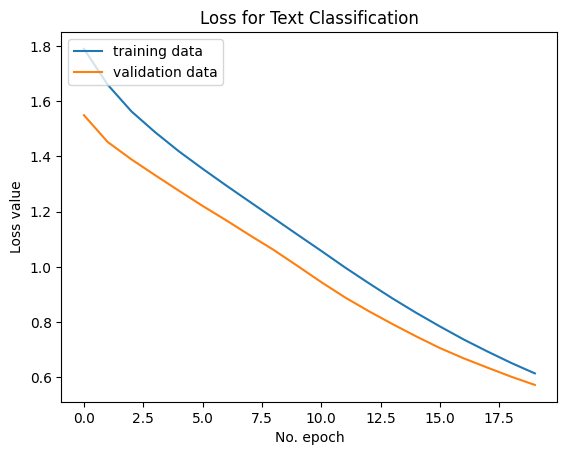

In [ ]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:

print("Evaluate on test data")
results = model.evaluate(x_test,test_labels)
print("test loss, test acc:", results)



print("Generate predictions for all samples")
predictions = model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
16/16 [==============================] - 0s 3ms/step - loss: 0.5752 - categorical_accuracy: 0.8247
test loss, test acc: [0.5751506686210632, 0.824701189994812]
Generate predictions for all samples
16/16 [==============================] - 0s 2ms/step
[[0.55030173 0.06266916 0.9428838  0.66730726 0.26816767]
 [0.07014847 0.4131059  0.118141   0.02256107 0.9126251 ]
 [0.8050572  0.28925923 0.7994288  0.13854906 0.40757802]
 ...
 [0.31049913 0.4805754  0.2392571  0.04296669 0.75198483]
 [0.69648033 0.7527019  0.3981545  0.03658111 0.24894373]
 [0.92609704 0.76999396 0.6561603  0.08087961 0.05489818]]


In [ ]:
test_data['pred_persona']= predict_results
test_data['pred_persona'] = np.where((test_data.pred_persona == 0),'agreeable',test_data.pred_persona)
test_data['pred_persona'] = np.where((test_data.pred_persona == '1'),'conscientiousness',test_data.pred_persona)
test_data['pred_persona'] = np.where((test_data.pred_persona == '2'),'extraverted',test_data.pred_persona)
test_data['pred_persona'] = np.where((test_data.pred_persona == '3'),'neuroticism',test_data.pred_persona)
test_data['pred_persona'] = np.where((test_data.pred_persona == '4'),'openness to experience',test_data.pred_persona)

In [ ]:
test_data.head(20)

,textID,text,persona,Num_words_text,pred_persona
0,1999,passionate about creating environment where ev...,extraverted,11,extraverted
1,2000,enthusiastic about working projects that invol...,openness to experience,13,openness to experience
2,2001,enjoy working with others achieve goals,agreeable,9,agreeable
3,2002,love roles that allow engage with clients unde...,extraverted,14,extraverted
4,2003,approach every project with focus detail thoro...,conscientiousness,12,conscientiousness
5,2004,anxious about presenting myself,neuroticism,7,neuroticism
6,2005,love being environments where engage with peop...,extraverted,14,extraverted
7,2006,focused finding solutions that work everyone,agreeable,9,agreeable
8,2007,find rewarding mentor guide others towards the...,extraverted,13,extraverted
9,2008,passionate about creating positive work cultur...,extraverted,12,extraverted


In [ ]:
# prompt: Using dataframe test_data: persona vs pred_persona

import altair as alt
alt.Chart(test_data).mark_bar().encode(
    alt.X("persona"),
    alt.Y("count()"),
    color='pred_persona'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
from sklearn.metrics import classification_report
labels = ['agreeable', 'conscientiousness','extraverted', 'neuroticism','openness to experience']

print(classification_report(test_data['persona'].tolist(),test_data['pred_persona'].tolist(),labels=labels))

                        precision    recall  f1-score   support

             agreeable       0.71      0.71      0.71       101
     conscientiousness       0.90      0.79      0.84       102
           extraverted       0.71      0.82      0.76        94
           neuroticism       0.98      0.86      0.92       108
openness to experience       0.84      0.94      0.89        97

              accuracy                           0.82       502
             macro avg       0.83      0.83      0.82       502
          weighted avg       0.83      0.82      0.83       502



In [ ]:
model.save('/content/drive/MyDrive/Persona Model/PersonaModel.h5')

In [ ]:
import pickle
pickle_out = open("pred_persona_model-ver1.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
input = "i do consider myself a hard worker"
input = clean_text(input)
input = np.array([input])
predictions = model.predict(input)
m = 0
for i in range(len(predictions[0])):
  if predictions[0][i] > m:
    m = predictions[0][i]
for n in range(len(predictions[0])):
  if predictions[0][n] == m:
    index = n
print(predictions)
print(le.classes_[index])

1/1 [==============================] - 0s 31ms/step
[[0.8650203  0.20784219 0.58770853 0.8436267  0.11101647]]
agreeable
